<a href="https://colab.research.google.com/github/yashv04/Prediction-Model/blob/main/Win_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [ ]:
df = pd.read_csv('IPL_ball_by_ball_updated.csv')

In [ ]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [ ]:
df.innings.unique()

array([2, 1, 4, 3, 6, 5])

In [ ]:
df = df[(df['innings'] == 1) | (df['innings'] == 2)]

In [ ]:
df.innings.unique()

array([2, 1])

In [ ]:
#additional columns - total runs in each ball, wickets fallen

In [ ]:
df['total_runs'] = df.apply(lambda x: x['runs_off_bat'] + x['extras'], axis = 1)

In [ ]:
type(df.player_dismissed[0])

float

In [ ]:
type(df.player_dismissed[13])

str

In [ ]:
df['isOut'] = df['player_dismissed'].notnull().astype(int)

In [ ]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0


In [ ]:
#adding teams t1 and t2
t1 = 'Mumbai Indians'
t2 = 'Royal Challengers Bangalore'

In [ ]:
outcomes = [0, 1, 2, 3, 4, 6, 'w']

In [ ]:
df[df.batting_team == t1].total_runs.value_counts()

,count
total_runs,
1,11336
0,9974
4,3198
2,1721
6,1403
3,104
5,54
7,7


In [ ]:
df[df.batting_team == t2].total_runs.value_counts()

,count
total_runs,
1,10900
0,9331
4,2983
2,1764
6,1365
3,91
5,47
7,13


In [ ]:
t1_outcomes_count = df[df.batting_team == t1].total_runs.value_counts()
t2_outcomes_count = df[df.batting_team == t2].total_runs.value_counts()

In [ ]:
df[df.batting_team == t1].isOut.sum()

1378

In [ ]:
df[df.batting_team == t2].isOut.sum()

1304

In [ ]:
t1_outs = df[df.batting_team == t1].isOut.sum()
t2_outs = df[df.batting_team == t2].isOut.sum()

In [ ]:
t1_outcomes = []
t2_outcomes = []

for outcome in outcomes:
  if outcome != 'w':
    t1_outcomes.append(t1_outcomes_count[outcome])
    t2_outcomes.append(t2_outcomes_count[outcome])
  else:
    t1_outcomes.append(t1_outs)
    t2_outcomes.append(t2_outs)

In [ ]:
t1_outcomes, t2_outcomes

([9974, 11336, 1721, 104, 3198, 1403, 1378],
 [9331, 10900, 1764, 91, 2983, 1365, 1304])

In [ ]:
t1_pb_outcomes = [i/sum(t1_outcomes) for i in t1_outcomes]
t2_pb_outcomes = [i/sum(t2_outcomes) for i in t2_outcomes]

In [ ]:
t1_pb_outcomes[0], t2_pb_outcomes[0]
t1_pb_outcomes[1], t2_pb_outcomes[1]
t1_pb_outcomes[2], t2_pb_outcomes[2]
t1_pb_outcomes[3], t2_pb_outcomes[3]
t1_pb_outcomes[4], t2_pb_outcomes[4]
t1_pb_outcomes[6], t2_pb_outcomes[6]
t1_pb_outcomes[outcomes.index('w')], t2_pb_outcomes[outcomes.index('w')]

(0.047331180875180325, 0.047011320210541496)

In [ ]:
t1_pb_outcomes, t2_pb_outcomes

([0.3425843236930686,
  0.3893659407845023,
  0.05911245448924916,
  0.003572164594353232,
  0.10984406127636188,
  0.04818987428728447,
  0.047331180875180325],
 [0.33639772153724135,
  0.3929627226187901,
  0.063595068137573,
  0.0032806979594779723,
  0.1075420001442065,
  0.04921046939216959,
  0.047011320210541496])

In [ ]:
np.cumsum(t1_pb_outcomes ), np.cumsum(t2_pb_outcomes )

(array([0.34258432, 0.73195026, 0.79106272, 0.79463488, 0.90447894,
        0.95266882, 1.        ]),
 array([0.33639772, 0.72936044, 0.79295551, 0.79623621, 0.90377821,
        0.95298868, 1.        ]))

In [ ]:
t1_pb_ls = np.cumsum(t1_pb_outcomes )
t2_pb_ls = np.cumsum(t2_pb_outcomes )

In [ ]:
np.random.random()

0.9132631493681326

In [ ]:
#predicting runs for 120 balls

pred_runs= 0
pred_wks = 0
balls = 120

i1p_0 = t1_pb_ls[0]
i1p_1 = t1_pb_ls[1]
i1p_2 = t1_pb_ls[2]
i1p_3 = t1_pb_ls[3]
i1p_4 = t1_pb_ls[4]
i1p_6 = t1_pb_ls[5]
i1p_w = t1_pb_ls[6]

i2p_0 = t2_pb_ls[0]
i2p_1 = t2_pb_ls[1]
i2p_2 = t2_pb_ls[2]
i2p_3 = t2_pb_ls[3]
i2p_4 = t2_pb_ls[4]
i2p_6 = t2_pb_ls[5]
i2p_w = t2_pb_ls[6]


for i in range(balls):
  r_value = np.random.random()
  if r_value <= i1p_0:
    pred_runs += 0
  elif r_value <= i1p_1:
    pred_runs += 1
  elif r_value <= i1p_2:
    pred_runs += 2
  elif r_value <= i1p_3:
    pred_runs += 3
  elif r_value <= i1p_4:
    pred_runs += 4
  elif r_value <= i1p_6:
    pred_runs += 6
  else:
    pred_runs += 0
    pred_wks += 1

  if pred_wks == 10:
    break


In [ ]:
pred_runs, pred_wks

(184, 6)

In [ ]:
pred_runs= 0
pred_wks = 0
balls = 120

for i in range(balls):
  r_value = np.random.random()
  if r_value <= i1p_0:
    pred_runs += 0
  elif r_value <= i2p_1:
    pred_runs += 1
  elif r_value <= i2p_2:
    pred_runs += 2
  elif r_value <= i2p_3:
    pred_runs += 3
  elif r_value <= i2p_4:
    pred_runs += 4
  elif r_value <= i2p_6:
    pred_runs += 6
  else:
    pred_runs += 0
    pred_wks += 1

  if pred_wks == 10:
    break

In [ ]:
pred_runs, pred_wks

(143, 4)

In [ ]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [ ]:
over_ball = 5.6
over_no = int(str(over_ball).split('.')[0])
ball_no = int(str(over_ball).split('.')[1])

print(over_no*6 + ball_no)


36


#Function 1st innings runs prediction

In [ ]:
def innings_1_runs(curr_score, curr_wickets, curr_overs):
  pred_runs= curr_score
  pred_wks = curr_wickets
  over_ball = curr_overs

  over_no = int(str(over_ball).split('.')[0])
  ball_no = int(str(over_ball).split('.')[1])

  leftover_balls = 120 - (over_no*6 + ball_no)

  i1p_0 = t1_pb_ls[0]
  i1p_1 = t1_pb_ls[1]
  i1p_2 = t1_pb_ls[2]
  i1p_3 = t1_pb_ls[3]
  i1p_4 = t1_pb_ls[4]
  i1p_6 = t1_pb_ls[5]
  i1p_w = t1_pb_ls[6]

  i2p_0 = t2_pb_ls[0]
  i2p_1 = t2_pb_ls[1]
  i2p_2 = t2_pb_ls[2]
  i2p_3 = t2_pb_ls[3]
  i2p_4 = t2_pb_ls[4]
  i2p_6 = t2_pb_ls[5]
  i2p_w = t2_pb_ls[6]

  for i in range(leftover_balls):
    r_value = np.random.random()
    if r_value <= i1p_0:
     pred_runs += 0
    elif r_value <= i1p_1:
     pred_runs += 1
    elif r_value <= i1p_2:
     pred_runs += 2
    elif r_value <= i1p_3:
     pred_runs += 3
    elif r_value <= i1p_4:
     pred_runs += 4
    elif r_value <= i1p_6:
     pred_runs += 6
    else:
     pred_runs += 0
     pred_wks += 1
    if pred_wks == 10:
      break

  return pred_runs

In [ ]:
innings_1_runs(183, 6, 18.2)

189

In [ ]:
#Function 2nd Innings Runs

In [ ]:
def innings_2_runs(curr_score, curr_wickets, curr_overs, target):
  pred_runs= curr_score
  pred_wks = curr_wickets
  over_ball = curr_overs

  over_no = int(str(over_ball).split('.')[0])
  ball_no = int(str(over_ball).split('.')[1])

  leftover_balls = 120 - (over_no*6 + ball_no)



  i2p_0 = t2_pb_ls[0]
  i2p_1 = t2_pb_ls[1]
  i2p_2 = t2_pb_ls[2]
  i2p_3 = t2_pb_ls[3]
  i2p_4 = t2_pb_ls[4]
  i2p_6 = t2_pb_ls[5]
  i2p_w = t2_pb_ls[6]

  for i in range(leftover_balls):
    r_value = np.random.random()
    if r_value <= i2p_0:
     pred_runs += 0
    elif r_value <= i2p_1:
     pred_runs += 1
    elif r_value <= i2p_2:
     pred_runs += 2
    elif r_value <= i2p_3:
     pred_runs += 3
    elif r_value <= i2p_4:
     pred_runs += 4
    elif r_value <= i2p_6:
     pred_runs += 6
    else:
     pred_runs += 0
     pred_wks += 1
    if pred_wks == 10:
      break
    if pred_runs > target:
      break

  return pred_runs

In [ ]:
innings_2_runs(196, 4, 17.3, 240)

217

In [ ]:
df[(df.batting_team == t1) & (df.bowling_team == t2) & (df.innings == 1)].match_id.unique()

array([ 335985,  392208,  392218,  419119,  419157,  419162,  548360,
        598033,  729287,  733983,  829737, 1136574, 1175362, 1254058,
       1304064])

In [ ]:
matchID = 1254058

In [ ]:
mdf = df[df.match_id == matchID]

In [ ]:
mdf.reset_index(inplace = True, drop = True)

In [ ]:
mdf.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",2,6.5,Royal Challengers Bangalore,Mumbai Indians,V Kohli,GJ Maxwell,KH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",2,6.6,Royal Challengers Bangalore,Mumbai Indians,GJ Maxwell,V Kohli,KH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",2,5.5,Royal Challengers Bangalore,Mumbai Indians,RM Patidar,V Kohli,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",2,7.2,Royal Challengers Bangalore,Mumbai Indians,GJ Maxwell,V Kohli,RD Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",2,7.1,Royal Challengers Bangalore,Mumbai Indians,GJ Maxwell,V Kohli,RD Chahar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0


In [ ]:
df1 = mdf[mdf.innings == 1]
df2 = mdf[mdf.innings == 2]

In [ ]:
df1.head(2)    #not sorted by balls

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
124,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.6,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,Mohammed Siraj,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
126,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,5.4,Mumbai Indians,Royal Challengers Bangalore,CA Lynn,SA Yadav,YS Chahal,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [ ]:
df1 = df1.sort_values('ball' , ascending = True)
df2 = df2.sort_values('ball' , ascending = True)

In [ ]:
df1.reset_index(inplace = True, drop = True)
df2.reset_index(inplace = True, drop = True)

#Innings 1 prediction

In [ ]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing1_runs_pred = []

for i in range(len(df1)):
  curr_score += df1.total_runs[i]
  curr_wickets += df1.isOut[i]
  curr_overs = df1.ball[i]

  prediction = innings_1_runs(curr_score, curr_wickets, curr_overs)
  ing1_runs_pred.append(prediction)

In [ ]:
#ing1_runs_pred

In [ ]:
actual_score = sum(df1.total_runs)

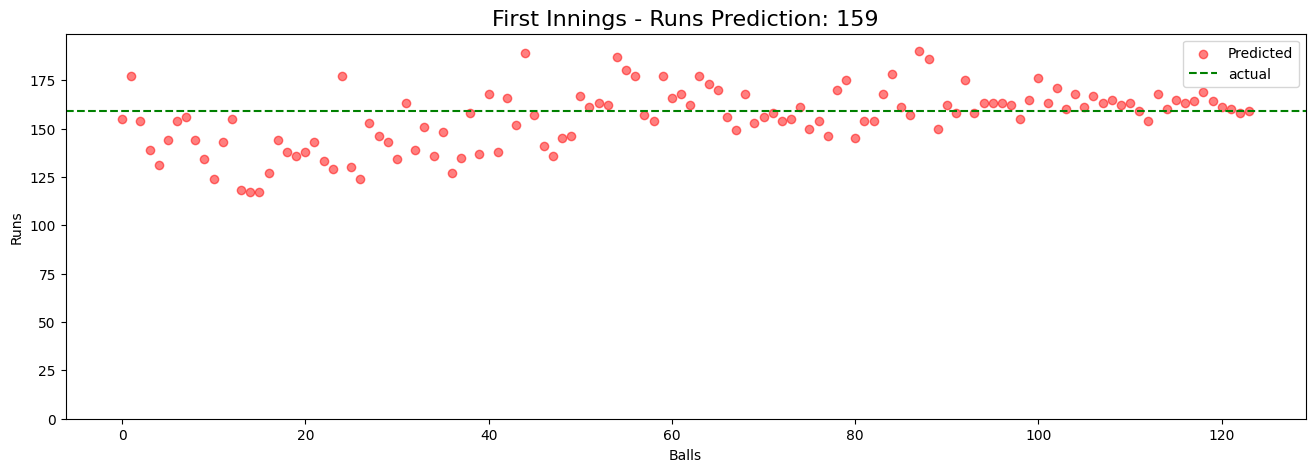

In [ ]:
import matplotlib.pyplot as plt
x_values = [i for i in range(len(df1))]
y_values = ing1_runs_pred

plt.figure(figsize = (16,5))
plt.scatter(x_values, y_values, color ='r', alpha = 0.5, label = 'Predicted')
plt.axhline(actual_score, ls= '--', color = 'g', label = 'actual')
plt.xlabel('Balls')
plt.ylabel('Runs')
plt.title('First Innings - Runs Prediction: ' + str(actual_score), fontsize = 16)
plt.legend()
plt.gca().set_ylim(0, actual_score + 40)
plt.show()

In [ ]:
error_ing1_ls = [abs(i - actual_score) for i in ing1_runs_pred]

In [ ]:
np.mean(error_ing1_ls)

12.008064516129032

#Innings 2 prediction

In [ ]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing2_runs_pred = []

for i in range(len(df2)):
  curr_score += df2.total_runs[i]
  curr_wickets += df2.isOut[i]
  curr_overs = df2.ball[i]
  target = actual_score + 1

  prediction = innings_2_runs(curr_score, curr_wickets, curr_overs, target)
  ing2_runs_pred.append(prediction)

In [ ]:
ing2_actual_score = sum(df2.total_runs)

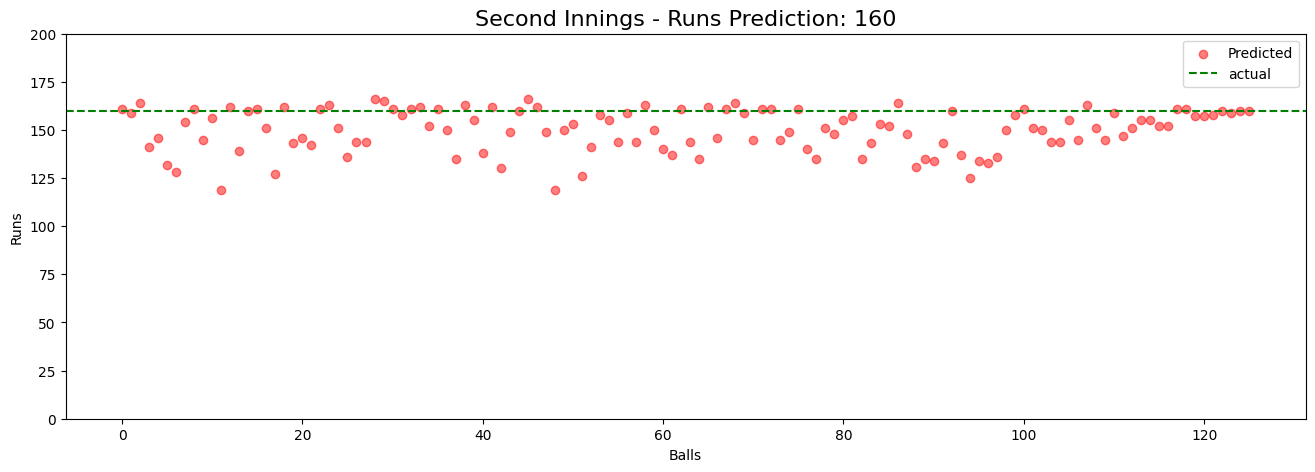

In [ ]:
import matplotlib.pyplot as plt
x_values = [i for i in range(len(df2))]
y_values = ing2_runs_pred

plt.figure(figsize = (16,5))
plt.scatter(x_values, y_values, color ='r', alpha = 0.5, label = 'Predicted')
plt.axhline(actual_score, ls= '--', color = 'g', label = 'actual')
plt.xlabel('Balls')
plt.ylabel('Runs')
plt.title('Second Innings - Runs Prediction: ' + str(ing2_actual_score), fontsize = 16)
plt.legend()
plt.gca().set_ylim(0, actual_score + 40)
plt.show()

In [ ]:
error_ing2_ls = [abs(i - ing2_actual_score) for i in ing2_runs_pred]

In [ ]:
np.mean(error_ing2_ls)

10.873015873015873

#Win Predictions 1st innings

In [ ]:
#intialize win, lose , tie - wrt to chasing team

win_count = 0
tie_count = 0
lose_count = 0

win_count_ls = []
tie_count_ls = []
lose_count_ls = []

ing1_curr_score = 0
ing1_curr_wickets = 0
ing1_curr_overs = 0

#each ball
for i in range(len(df1)):
  #1st innings values
  ing1_curr_score += df1.total_runs[i]
  ing1_curr_wickets += df1.isOut[i]
  ing1_curr_overs = df1.ball[i]

  #2nd innings values
  ing2_curr_score = 0
  ing2_curr_wickets = 0
  ing2_curr_overs = 0.0

  #100 iterations
  for j in range(100):
    ings1_runs_prediction = innings_1_runs(ing1_curr_score, ing1_curr_wickets, ing1_curr_overs)
    target = ings1_runs_prediction
    ings2_runs_prediction = innings_2_runs(ing2_curr_score, ing2_curr_wickets, ing2_curr_overs, target)

    if ings2_runs_prediction > target:
      win_count += 1
    elif ings2_runs_prediction == target:
      tie_count += 1
    else:
      lose_count += 1

  win_count_ls.append(win_count)
  lose_count_ls.append(lose_count)
  tie_count_ls.append(tie_count)

  win_count = 0
  lose_count = 0
  tie_count = 0

In [ ]:
#win_count_ls, lose_count_ls, tie_count_ls

#Win prediction 2nd Innings

In [ ]:
ing2_curr_score = 0
ing2_curr_wickets = 0
ing2_curr_overs = 0.0

target = actual_score

#each ball
for i in range(len(df2)):

  #2nd innings values
  ing2_curr_score += df2.total_runs[i]
  ing2_curr_wickets += df2.isOut[i]
  ing2_curr_overs = df2.ball[i]

  #100 iterations
  for j in range(100):

    ings2_runs_prediction = innings_2_runs(ing2_curr_score, ing2_curr_wickets, ing2_curr_overs, target)

    if ings2_runs_prediction > target:
      win_count += 1
    elif ings2_runs_prediction == target:
      tie_count += 1
    else:
      lose_count += 1

  win_count_ls.append(win_count)
  lose_count_ls.append(lose_count)
  tie_count_ls.append(tie_count)

  win_count = 0
  lose_count = 0
  tie_count = 0

In [ ]:
len(win_count_ls), len(lose_count_ls), len(tie_count_ls)

(250, 250, 250)

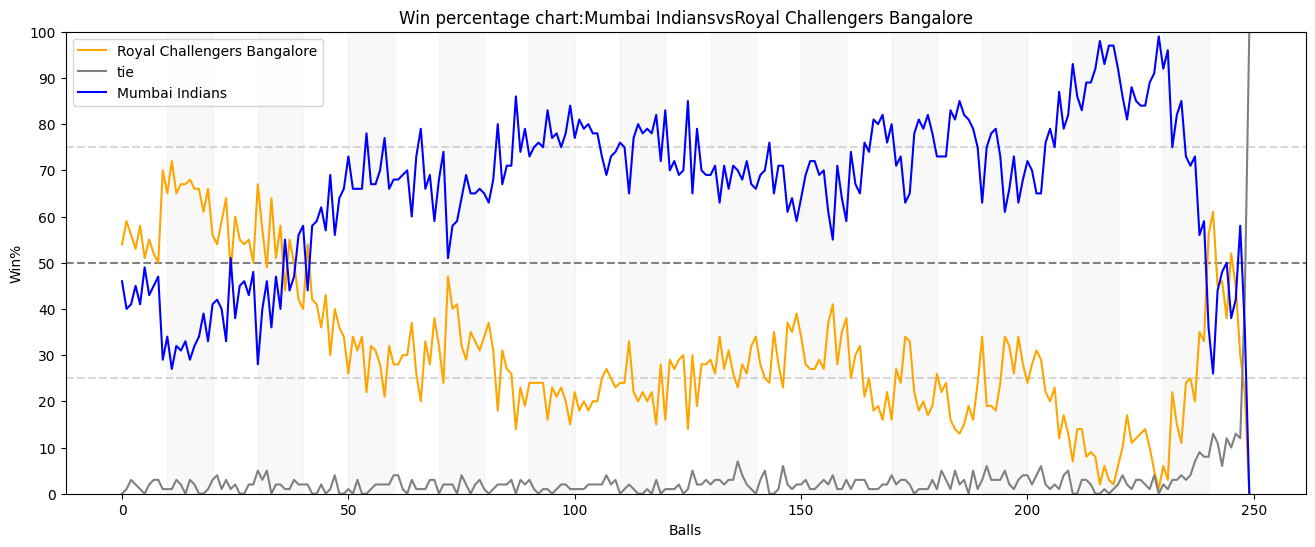

In [ ]:
plt.figure(figsize = (16,6))
x1_values = [i for i in range(len(win_count_ls))]
y1_values = win_count_ls

x2_values = [i for i in range(len(tie_count_ls))]
y2_values = tie_count_ls

x3_values = [i for i in range(len(lose_count_ls))]
y3_values = lose_count_ls

for i in range(10, len(mdf), 20):
  if i < len(mdf) - 10:
    plt.axvspan(i, i+10, ymin = 0, ymax = 100, alpha = 0.05, color = 'grey')

plt.axhline(y= 75, ls ='--',alpha = 0.3, color = 'grey')
plt.axhline(y= 50, ls ='--',alpha = 1, color = 'grey')
plt.axhline(y= 25, ls ='--',alpha = 0.3, color = 'grey')


plt.plot(x1_values, y1_values, color = 'orange', label = t2)
plt.plot(x2_values, y2_values, color = 'grey', label = 'tie')
plt.plot(x3_values, y3_values, color = 'blue', label = t1)


plt.gca().set_ylim(0, 100)
plt.yticks([0, 10,20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Win percentage chart:' + t1 + 'vs' + t2)
plt.xlabel('Balls')
plt.ylabel('Win%')
plt.legend()
plt.show()